In [2]:
# Import MNIST dataset
from keras.datasets import mnist

# Load training and testind data: samples and labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Import network models and layer types
from keras import models
from keras import layers

In [3]:
# Define network using high level API

# Model: feed forward network
network = models.Sequential()

# Add one fully connected layer
# Input: MNIST image transformed to vector (obfuscating spatial correlations!) 
# Activation: ReLu
#
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# Add classifier output with softmax
network.add(layers.Dense(10, activation='softmax'))

# Use RMSProp optimization, cat cross-entropy and track accuracy metric
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [4]:
# Prepare input data in 1D vector shape
# Normalize images 

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [5]:
# Import 1-hot encoder
from keras.utils import to_categorical

# Transform integer labels to 1-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_labels.shape

(60000, 10)

In [7]:
# Traning invocation
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2581 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1039 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0690 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0507 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0381 - acc: 0.9884


In [8]:
# Evaluate network performance 
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 17us/step


In [9]:
# Check model accuracy on test data: generalization performance 
print('test_acc:', test_acc)

test_acc: 0.9804


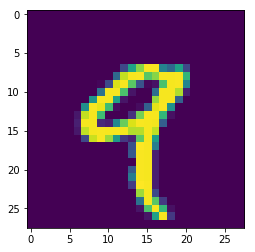

In [4]:
# Sample plot

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]

import matplotlib.pyplot as plt
#plt.imshow(digit, cmap=plt.cm.binary)
plt.imshow(digit)

